## 1. Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import acquire
import prepare
from scipy import stats
import os
from env import get_connection
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

In [2]:
def get_titanic_data():

    if os.path.isfile('titanic.csv'):
        
        return pd.read_csv('titanic.csv')
    
    else:
       
        url = get_connection('titanic_db')
        
        query = '''
        SELECT *
        FROM passengers 
        '''

        df = pd.read_sql(query, url)
        
        df.to_csv('titanic.csv')

        return df  

In [3]:
titanic_df = get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


## 2. Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

In [4]:
def get_iris_data():

    if os.path.isfile('iris_df.csv'):
        
        return pd.read_csv('iris_df.csv')
    
    else:
       
        url = get_connection('iris_db')
        
        query = '''
        SELECT *
        FROM species
        JOIN measurements
        USING(species_id); 
        '''

        df = pd.read_sql(query, url)
        
        df.to_csv('iris_df.csv')

        return df  

In [5]:
iris_df = get_iris_data()
iris_df.head()

,Unnamed: 0,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,1,setosa,2,4.9,3.0,1.4,0.2
2,2,1,setosa,3,4.7,3.2,1.3,0.2
3,3,1,setosa,4,4.6,3.1,1.5,0.2
4,4,1,setosa,5,5.0,3.6,1.4,0.2


## 3. Make a function named get_telco_data that returns the data from the telco_churn database in SQL. In your SQL, be sure to join contract_types, internet_service_types, payment_types tables with the customers table, so that the resulting dataframe contains all the contract, payment, and internet service options. Obtain your data from the Codeup Data Science Database.

In [6]:
def get_telco_data():

    if os.path.isfile('telco.csv'):
        
        return pd.read_csv('telco.csv')
    
    else:
       
        url = get_connection('telco_churn')
        
        query = '''
        SELECT *
        FROM customers
        JOIN contract_types USING(contract_type_id)
        JOIN internet_service_types USING(internet_service_type_id)
        JOIN payment_types USING(payment_type_id);
        '''

        df = pd.read_sql(query, url)
        
        df.to_csv('telco.csv')

        return df  

In [7]:
telco_df = get_telco_data()
telco_df.head()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


## 4. Once you've got your get_titanic_data, get_iris_data, and get_telco_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for the local filename of telco.csv, titanic.csv, or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.

In [4]:
import acquire

In [9]:
acquire.get_titanic_data()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [10]:
acquire.get_iris_data()

,Unnamed: 0,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,1,setosa,2,4.9,3.0,1.4,0.2
2,2,1,setosa,3,4.7,3.2,1.3,0.2
3,3,1,setosa,4,4.6,3.1,1.5,0.2
4,4,1,setosa,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...,...,...,...
145,145,3,virginica,146,6.7,3.0,5.2,2.3
146,146,3,virginica,147,6.3,2.5,5.0,1.9
147,147,3,virginica,148,6.5,3.0,5.2,2.0
148,148,3,virginica,149,6.2,3.4,5.4,2.3


In [11]:
acquire.get_telco_data()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,2,1,2,9987-LUTYD,Female,0,No,No,13,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,7040,2,1,1,9992-UJOEL,Male,0,No,No,2,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


# Data Preparation 

## Using the Iris Data:

1. Use the function defined in acquire.py to load the iris data.

2. Drop the species_id and measurement_id columns.

3. Rename the species_name column to just species.

4. Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [12]:
iris_data = acquire.get_iris_data()
iris_data.head()

,Unnamed: 0,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,1,setosa,2,4.9,3.0,1.4,0.2
2,2,1,setosa,3,4.7,3.2,1.3,0.2
3,3,1,setosa,4,4.6,3.1,1.5,0.2
4,4,1,setosa,5,5.0,3.6,1.4,0.2


In [13]:
iris_data = iris_data.drop(columns = ['species_id', 'measurement_id'])

In [14]:
iris_data = iris_data.rename(columns={'species_name':'species'})
iris_data

,Unnamed: 0,species,sepal_length,sepal_width,petal_length,petal_width
0,0,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,2,setosa,4.7,3.2,1.3,0.2
3,3,setosa,4.6,3.1,1.5,0.2
4,4,setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...,...
145,145,virginica,6.7,3.0,5.2,2.3
146,146,virginica,6.3,2.5,5.0,1.9
147,147,virginica,6.5,3.0,5.2,2.0
148,148,virginica,6.2,3.4,5.4,2.3


In [15]:
dummies = pd.get_dummies(iris_data['species'], drop_first=True)
iris_data = pd.concat([iris_data, dummies], axis = 1)


In [7]:
def prep_iris(iris_data):
    
    iris_data = iris_data.drop(columns = ['species_id', 'measurement_id'])
    
    iris_data = iris_data.rename(columns={'species_name':'species'})

    dummies = pd.get_dummies(iris_data['species'], drop_first=True)
    
    iris_data = pd.concat([iris_data, dummies], axis = 1)
    
    return iris_data

In [17]:
prep_iris(acquire.get_iris_data())

,Unnamed: 0,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,0,setosa,5.1,3.5,1.4,0.2,0,0
1,1,setosa,4.9,3.0,1.4,0.2,0,0
2,2,setosa,4.7,3.2,1.3,0.2,0,0
3,3,setosa,4.6,3.1,1.5,0.2,0,0
4,4,setosa,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...,...,...
145,145,virginica,6.7,3.0,5.2,2.3,0,1
146,146,virginica,6.3,2.5,5.0,1.9,0,1
147,147,virginica,6.5,3.0,5.2,2.0,0,1
148,148,virginica,6.2,3.4,5.4,2.3,0,1


## Using the Titanic dataset

1. Use the function defined in acquire.py to load the Titanic data.

2. Drop any unnecessary, unhelpful, or duplicated columns.

3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.



In [18]:
titanic_df = acquire.get_titanic_data()

In [19]:
titanic_df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [20]:
titanic_df = titanic_df.drop(columns=['passenger_id','embarked','class', 'age','deck'])
titanic_df.head()


,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,female,1,0,71.2833,Cherbourg,0
2,1,3,female,0,0,7.9250,Southampton,1
3,1,1,female,1,0,53.1000,Southampton,0
4,0,3,male,0,0,8.0500,Southampton,1


In [21]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   sibsp        891 non-null    int64  
 4   parch        891 non-null    int64  
 5   fare         891 non-null    float64
 6   embark_town  889 non-null    object 
 7   alone        891 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


In [22]:
dummy_df = pd.get_dummies(titanic_df[['sex','embark_town']], drop_first= True)
dummy_df.head()

,sex_male,embark_town_Queenstown,embark_town_Southampton
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [23]:
titanic_df = pd.concat([titanic_df, dummy_df], axis=1)
titanic_df.head()


,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [24]:
titanic_df.isna().sum()

survived                   0
pclass                     0
sex                        0
sibsp                      0
parch                      0
fare                       0
embark_town                2
alone                      0
sex_male                   0
embark_town_Queenstown     0
embark_town_Southampton    0
dtype: int64

In [25]:
titanic_df['embark_town'].fillna('Southampton', inplace = True)


In [75]:
def prep_titantic(titanic_df):
    
    titanic_df = titanic_df.drop(columns=['passenger_id','embarked','class', 'age','deck'])
    
    titanic_df['embark_town'].fillna('Southampton', inplace = True)
    
    dummies = pd.get_dummies(titanic_df[['sex', 'embark_town']], drop_first = True)
    
    titanic_df = pd.concat([titanic_df, dummies], axis = 1)
    
    return titanic_df

In [27]:
prep_titantic(acquire.get_titanic_data())

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Southampton,1,1,0,1
887,1,1,female,0,0,30.0000,Southampton,1,0,0,1
888,0,3,female,1,2,23.4500,Southampton,0,0,0,1
889,1,1,male,0,0,30.0000,Cherbourg,1,1,0,0


## Using the Telco dataset

1. Use the function defined in acquire.py to load the Telco data.

2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [28]:
telco_df = acquire.get_telco_data()
telco_df

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,2,1,2,9987-LUTYD,Female,0,No,No,13,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,7040,2,1,1,9992-UJOEL,Male,0,No,No,2,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [29]:
telco_df.columns.to_list()

['Unnamed: 0',
 'payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [30]:
telco_df = telco_df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'Unnamed: 0'])

In [31]:
telco_df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [32]:
telco_df['gender_encoded'] = telco_df.gender.map({'Female': 1, 'Male': 0})

telco_df['partner_encoded'] = telco_df.partner.map({'Yes': 1, 'No': 0})

telco_df['dependents_encoded'] = telco_df.dependents.map({'Yes': 1, 'No': 0})

telco_df['phone_service_encoded'] = telco_df.phone_service.map({'Yes': 1, 'No': 0})

telco_df['paperless_billing_encoded'] = telco_df.paperless_billing.map({'Yes': 1, 'No': 0})

telco_df['churn_encoded'] = telco_df.churn.map({'Yes': 1, 'No': 0})


In [33]:
telco_df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,No,One year,DSL,Mailed check,1,1,1,1,1,0
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,Month-to-month,DSL,Mailed check,0,0,0,1,0,0
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,Yes,Month-to-month,Fiber optic,Electronic check,0,0,0,1,1,1
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,1
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Month-to-month,Fiber optic,Mailed check,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,...,No,One year,DSL,Mailed check,1,0,0,1,0,0
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,...,Yes,Month-to-month,Fiber optic,Electronic check,0,1,0,1,1,1
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,...,No,Month-to-month,DSL,Mailed check,0,0,0,1,1,0
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,No,Two year,DSL,Mailed check,0,1,1,1,0,0


In [34]:
telco_df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'gender_encoded', 'partner_encoded',
       'dependents_encoded', 'phone_service_encoded',
       'paperless_billing_encoded', 'churn_encoded'],
      dtype='object')

In [35]:
dummy_df = pd.get_dummies(telco_df[['multiple_lines', 'online_security', 
                              'online_backup', 'device_protection', 
                              'tech_support', 'streaming_tv',   'streaming_movies',
                              'contract_type', 'internet_service_type', 'payment_type']],
                              drop_first=True)
dummy_df.head()

,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,0,0,0,1,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,1


In [36]:
telco_df = pd.concat([telco_df, dummy_df], axis = 1)
telco_df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,...,0,0,0,1,0,0,0,0,0,1
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,...,0,0,1,0,0,1,0,0,1,0
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,...,0,0,0,0,0,0,0,0,0,1
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,0,0,1,0,1,0,0,0,0,1


In [101]:
def prep_telco(telco_df):
    
    telco_df = telco_df.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id', 'Unnamed: 0'])
    
    telco_df['gender_encoded'] = telco_df.gender.map({'Female': 1, 'Male': 0})

    telco_df['partner_encoded'] = telco_df.partner.map({'Yes': 1, 'No': 0})

    telco_df['dependents_encoded'] = telco_df.dependents.map({'Yes': 1, 'No': 0})

    telco_df['phone_service_encoded'] = telco_df.phone_service.map({'Yes': 1, 'No': 0})

    telco_df['paperless_billing_encoded'] = telco_df.paperless_billing.map({'Yes': 1, 'No': 0})

    telco_df['churn_encoded'] = telco_df.churn.map({'Yes': 1, 'No': 0})
    
    
    dummy_df = pd.get_dummies(telco_df[['multiple_lines', 'online_security', 
                              'online_backup', 'device_protection', 
                              'tech_support', 'streaming_tv',   'streaming_movies',
                              'contract_type', 'internet_service_type', 'payment_type']],
                              drop_first=True)
    
    
    telco_df = pd.concat([telco_df, dummy_df], axis = 1)
    
    return telco_df

In [38]:
prep_telco(acquire.get_telco_data())

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,...,0,0,0,1,0,0,0,0,0,1
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,...,0,0,1,0,0,1,0,0,1,0
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,...,0,0,0,0,0,0,0,0,0,1
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,0,0,1,0,1,0,0,0,0,1


# Split Your Data

1. Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

In [7]:
def train_val_test(df,col):
    seed = 42
    
    train,val_test = train_test_split(df, train_size = 0.7, random_state = seed, stratify = df[col])
    
    validate, test = train_test_split(val_test, train_size = 0.5, random_state = seed, stratify = val_test[col])
    
    return train, validate, test

2. Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.

In [40]:
iris_data.head()

,Unnamed: 0,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,0,setosa,5.1,3.5,1.4,0.2,0,0
1,1,setosa,4.9,3.0,1.4,0.2,0,0
2,2,setosa,4.7,3.2,1.3,0.2,0,0
3,3,setosa,4.6,3.1,1.5,0.2,0,0
4,4,setosa,5.0,3.6,1.4,0.2,0,0


In [47]:
col = 'species'

In [48]:
train_iris, validate_iris, test_iris = train_val_test(iris_data, col)

In [ ]:
print(train_iris.shape) 
print(validate_iris.shape)
print(test_iris.shape)

In [ ]:
iris_data.shape

3. Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.

In [ ]:
titanic_df.head()

In [ ]:
col = 'embark_town'

In [ ]:
train_titanic, validate_titanic, test_titanic = train_val_test(titanic_df, col)

In [ ]:
print(train_titanic.shape)
print(validate_titanic.shape)
print(test_titanic.shape)

In [ ]:
titanic_df.shape

4. Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [ ]:
telco_df.columns[telco_df.columns.str.contains('chu')]

In [ ]:
col = 'churn'

In [ ]:
train_telco, validate_telco, test_telco = train_val_test(telco_df, col)

In [ ]:
print(train_telco.shape)
print(validate_telco.shape)
print(test_telco.shape)

In [ ]:
telco_df.shape

In [ ]:
train_telco

# Part 1 Exploratory Data

## Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

1. Acquire, prepare & split your data.

In [4]:
iris = acquire.get_iris_data()
iris

,Unnamed: 0,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,1,setosa,2,4.9,3.0,1.4,0.2
2,2,1,setosa,3,4.7,3.2,1.3,0.2
3,3,1,setosa,4,4.6,3.1,1.5,0.2
4,4,1,setosa,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...,...,...,...
145,145,3,virginica,146,6.7,3.0,5.2,2.3
146,146,3,virginica,147,6.3,2.5,5.0,1.9
147,147,3,virginica,148,6.5,3.0,5.2,2.0
148,148,3,virginica,149,6.2,3.4,5.4,2.3


In [9]:
df = prep_iris(iris)
df = df.drop(columns= ['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       150 non-null    object 
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   versicolor    150 non-null    uint8  
 6   virginica     150 non-null    uint8  
dtypes: float64(4), object(1), uint8(2)
memory usage: 6.3+ KB


In [10]:
col = 'species'
train, validate, test = train_val_test(df, col)
train.shape, validate.shape, test.shape

((105, 7), (22, 7), (23, 7))

## 2. Univariate Stats

 - For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

 - For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

 - Document takeaways & any actions.

In [11]:
num_vars = df.select_dtypes(include = ['float64'])
cat_vars = df.select_dtypes(include= ['object', 'uint8'])

In [157]:
num_vars.columns.to_list()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [12]:
num_vars.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


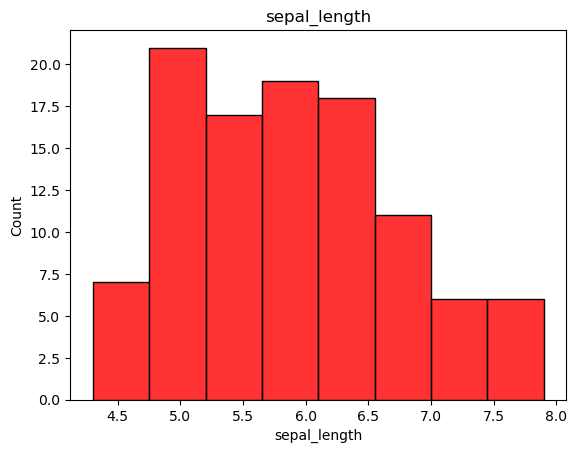

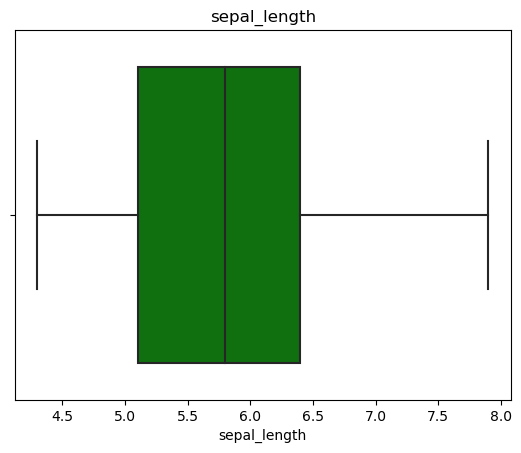

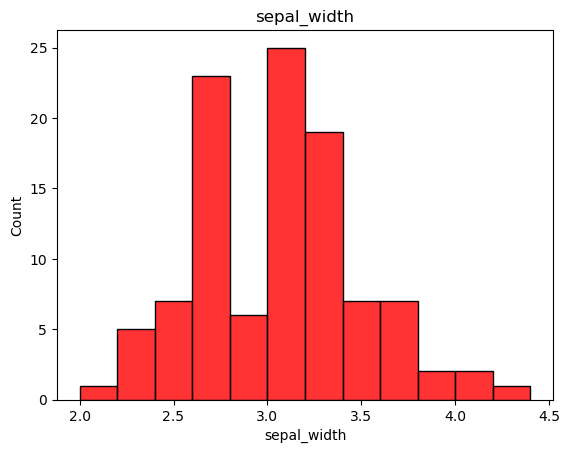

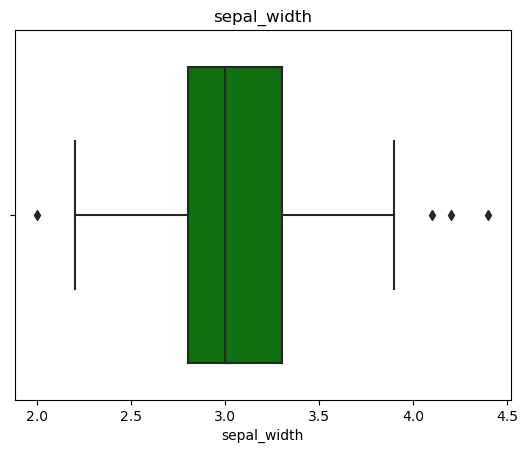

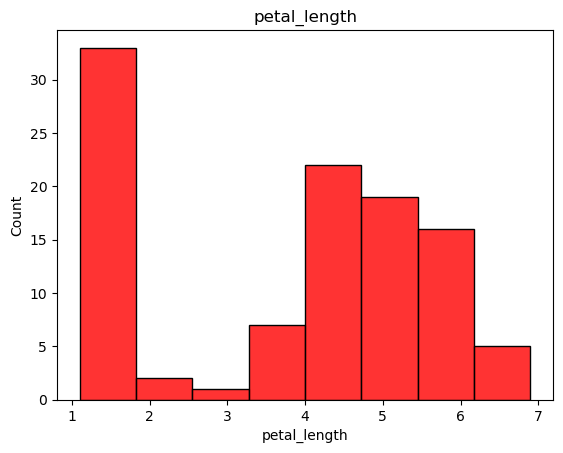

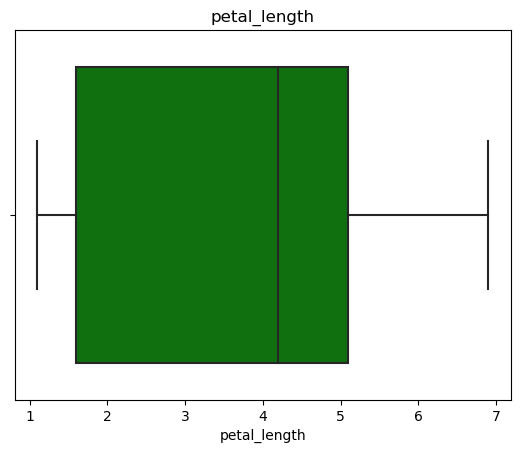

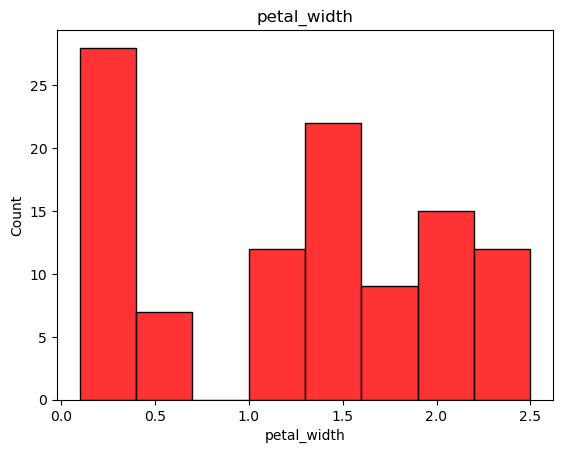

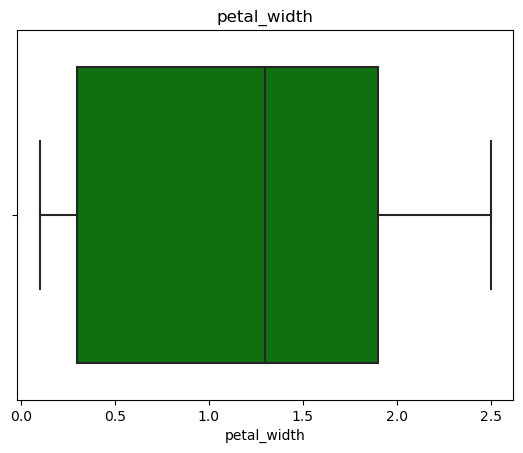

In [171]:
for col in num_vars:
    sns.histplot(x=col, data = train, color = 'red', alpha = .8)
    plt.title(col)
    plt.show()
    
    sns.boxplot(train[col], color = 'green')
    plt.title(col)
    plt.show()
    
    train[col].describe()


**Takeaways**
- Sepal Length and Sepal Width are normally distributed
- Petal Length and Petal Width don't seem to be normally distributed. They both tend to have 2 peaks 

## 3. Bivariate Stats

 - Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

 - For each measurement type, compute the descriptive statistics for each species.

 - For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

 - Document takeaways & any actions.

In [16]:
num_vars.columns.to_list()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

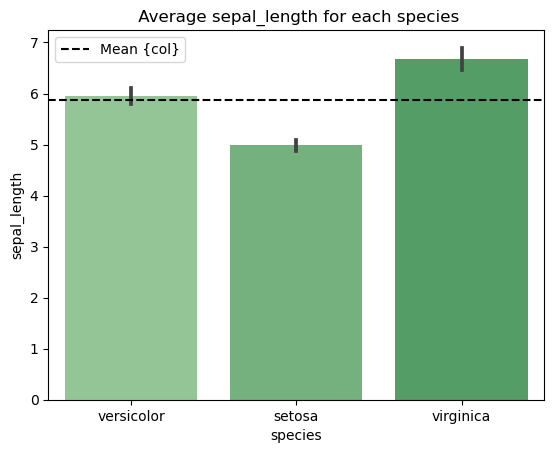

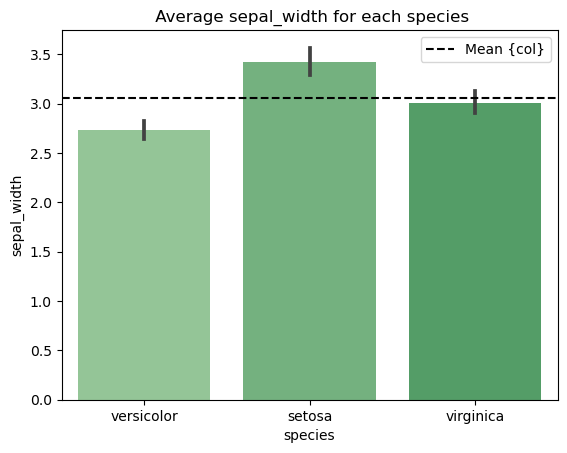

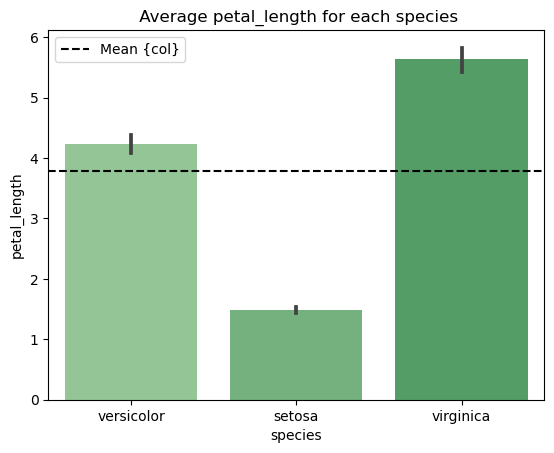

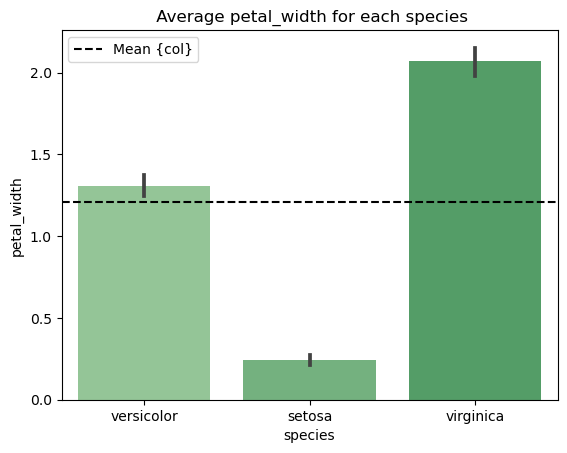

In [182]:
for col in num_vars:
    plt.title(f' Average {col} for each species')
    sns.barplot(x = 'species', y = col, data = train, palette = sns.color_palette("Greens_d"))
    overall_mean = train[col].mean()
    plt.axhline(overall_mean, label = "Mean {col}", color = 'black', ls = '--')
    plt.legend()
    plt.show()


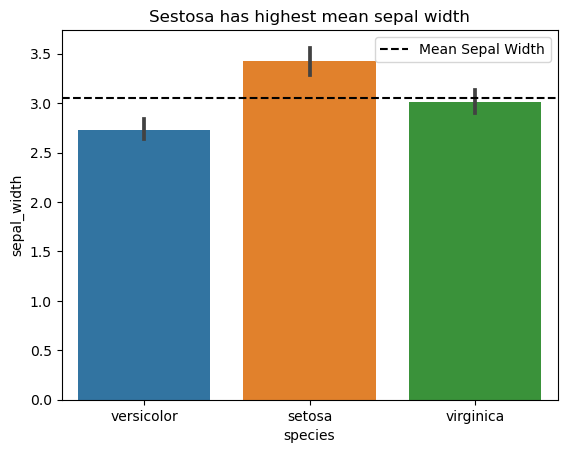

In [18]:
plt.title("Sestosa has highest mean sepal width")
sns.barplot(x = 'species', y = 'sepal_width', data = train)
mean_sepal_width = train.sepal_width.mean()
plt.axhline(mean_sepal_width, label = "Mean Sepal Width", color = 'black', ls = '--')
plt.legend()
plt.show()

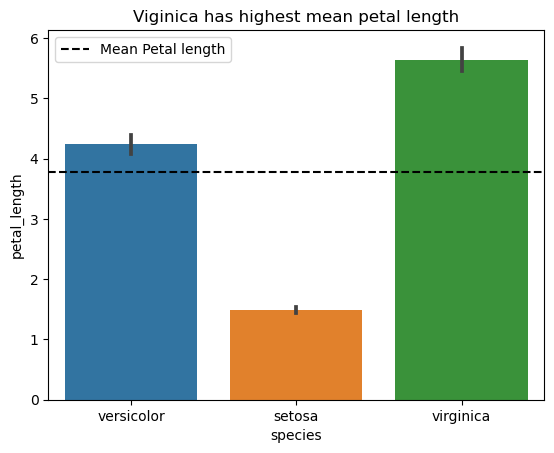

In [19]:
plt.title("Viginica has highest mean petal length")
sns.barplot(x = 'species', y = 'petal_length', data = train)
mean_petal_length = train.petal_length.mean()
plt.axhline(mean_petal_length, label = "Mean Petal length", color = 'black', ls = '--')
plt.legend()
plt.show()

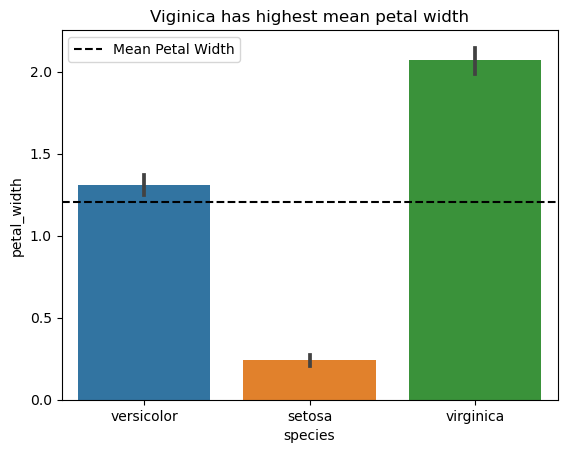

In [20]:
plt.title("Viginica has highest mean petal width")
sns.barplot(x = 'species', y = 'petal_width', data = train)
mean_petal_width = train.petal_width.mean()
plt.axhline(mean_petal_width, label = "Mean Petal Width", color = 'black', ls = '--')
plt.legend()
plt.show()

In [21]:
setosa_sl = pd.DataFrame(train[train.species == 'setosa']['sepal_length'].describe())
setosa_sw = pd.DataFrame(train[train.species == 'setosa']['sepal_width'].describe())
setosa_pl = pd.DataFrame(train[train.species == 'setosa']['petal_length'].describe())
setosa_pw = pd.DataFrame(train[train.species == 'setosa']['petal_width'].describe())

setosa_stats = pd.concat([setosa_sl, setosa_sw, setosa_pl, setosa_pw], axis = 1)
setosa_stats

,sepal_length,sepal_width,petal_length,petal_width
count,35.000000,35.000000,35.000000,35.000000
mean,4.988571,3.425714,1.485714,0.240000
std,0.326092,0.423114,0.153667,0.097619
min,4.300000,2.300000,1.100000,0.100000
25%,4.800000,3.100000,1.400000,0.200000
50%,5.000000,3.400000,1.500000,0.200000
75%,5.150000,3.700000,1.550000,0.300000
max,5.700000,4.400000,1.900000,0.400000


In [22]:
versicolor_sl = pd.DataFrame(train[train.species == 'versicolor']['sepal_length'].describe())
versicolor_sw = pd.DataFrame(train[train.species == 'versicolor']['sepal_width'].describe())
versicolor_pl = pd.DataFrame(train[train.species == 'versicolor']['petal_length'].describe())
versicolor_pw = pd.DataFrame(train[train.species == 'versicolor']['petal_width'].describe())

versicolor_stats = pd.concat([versicolor_sl, versicolor_sw, versicolor_pl, versicolor_pw], axis = 1)
versicolor_stats

,sepal_length,sepal_width,petal_length,petal_width
count,35.000000,35.000000,35.000000,35.000000
mean,5.948571,2.731429,4.237143,1.308571
std,0.497861,0.296818,0.466581,0.191544
min,5.000000,2.000000,3.000000,1.000000
25%,5.600000,2.550000,4.000000,1.200000
50%,5.900000,2.800000,4.200000,1.300000
75%,6.250000,2.950000,4.600000,1.450000
max,7.000000,3.200000,5.100000,1.800000


In [23]:
virginica_sl = pd.DataFrame(train[train.species == 'virginica']['sepal_length'].describe())
virginica_sw = pd.DataFrame(train[train.species == 'virginica']['sepal_width'].describe())
virginica_pl = pd.DataFrame(train[train.species == 'virginica']['petal_length'].describe())
virginica_pw = pd.DataFrame(train[train.species == 'virginica']['petal_width'].describe())

virginica_stats = pd.concat([virginica_sl, virginica_sw, virginica_pl, virginica_pw], axis = 1)
virginica_stats

,sepal_length,sepal_width,petal_length,petal_width
count,35.000000,35.000000,35.000000,35.000000
mean,6.682857,3.008571,5.631429,2.068571
std,0.661320,0.347573,0.576384,0.256414
min,5.600000,2.200000,4.800000,1.500000
25%,6.300000,2.800000,5.100000,1.900000
50%,6.700000,3.000000,5.600000,2.100000
75%,7.200000,3.200000,6.000000,2.300000
max,7.900000,3.800000,6.900000,2.500000


$H_0$: There is no significant difference in the mean petal width for Virginica and Veriscolor<br>
$H_a$: There is a significant difference in the mean petal width for Virginica and Veriscolor

In [2]:
𝜶 = 0.05

In [12]:
virginica = train[train.species == 'virginica']
versicolor = train[train.species == 'versicolor']
setosa = train[train.species == 'setosa']

t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width)
t, p

(1215.0, 1.2684064129030708e-12)

In [186]:
if p < 𝜶:
    print("We reject H₀")
else:
    print("We fail to reject H₀")

We reject H₀


**Takeaways**

 - petal_length and petal_width show the most seperation between species.
 - viginica iris have the largest petals.
 - setosa iris have the smallest petals.
 - setosa seem to have wide & short sepals.
 - there appears to be a significant difference in the petal width of Virginica and Veriscolor flowers.

## Multivariate Stats

- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

- Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

- Document takeaways and any actions.

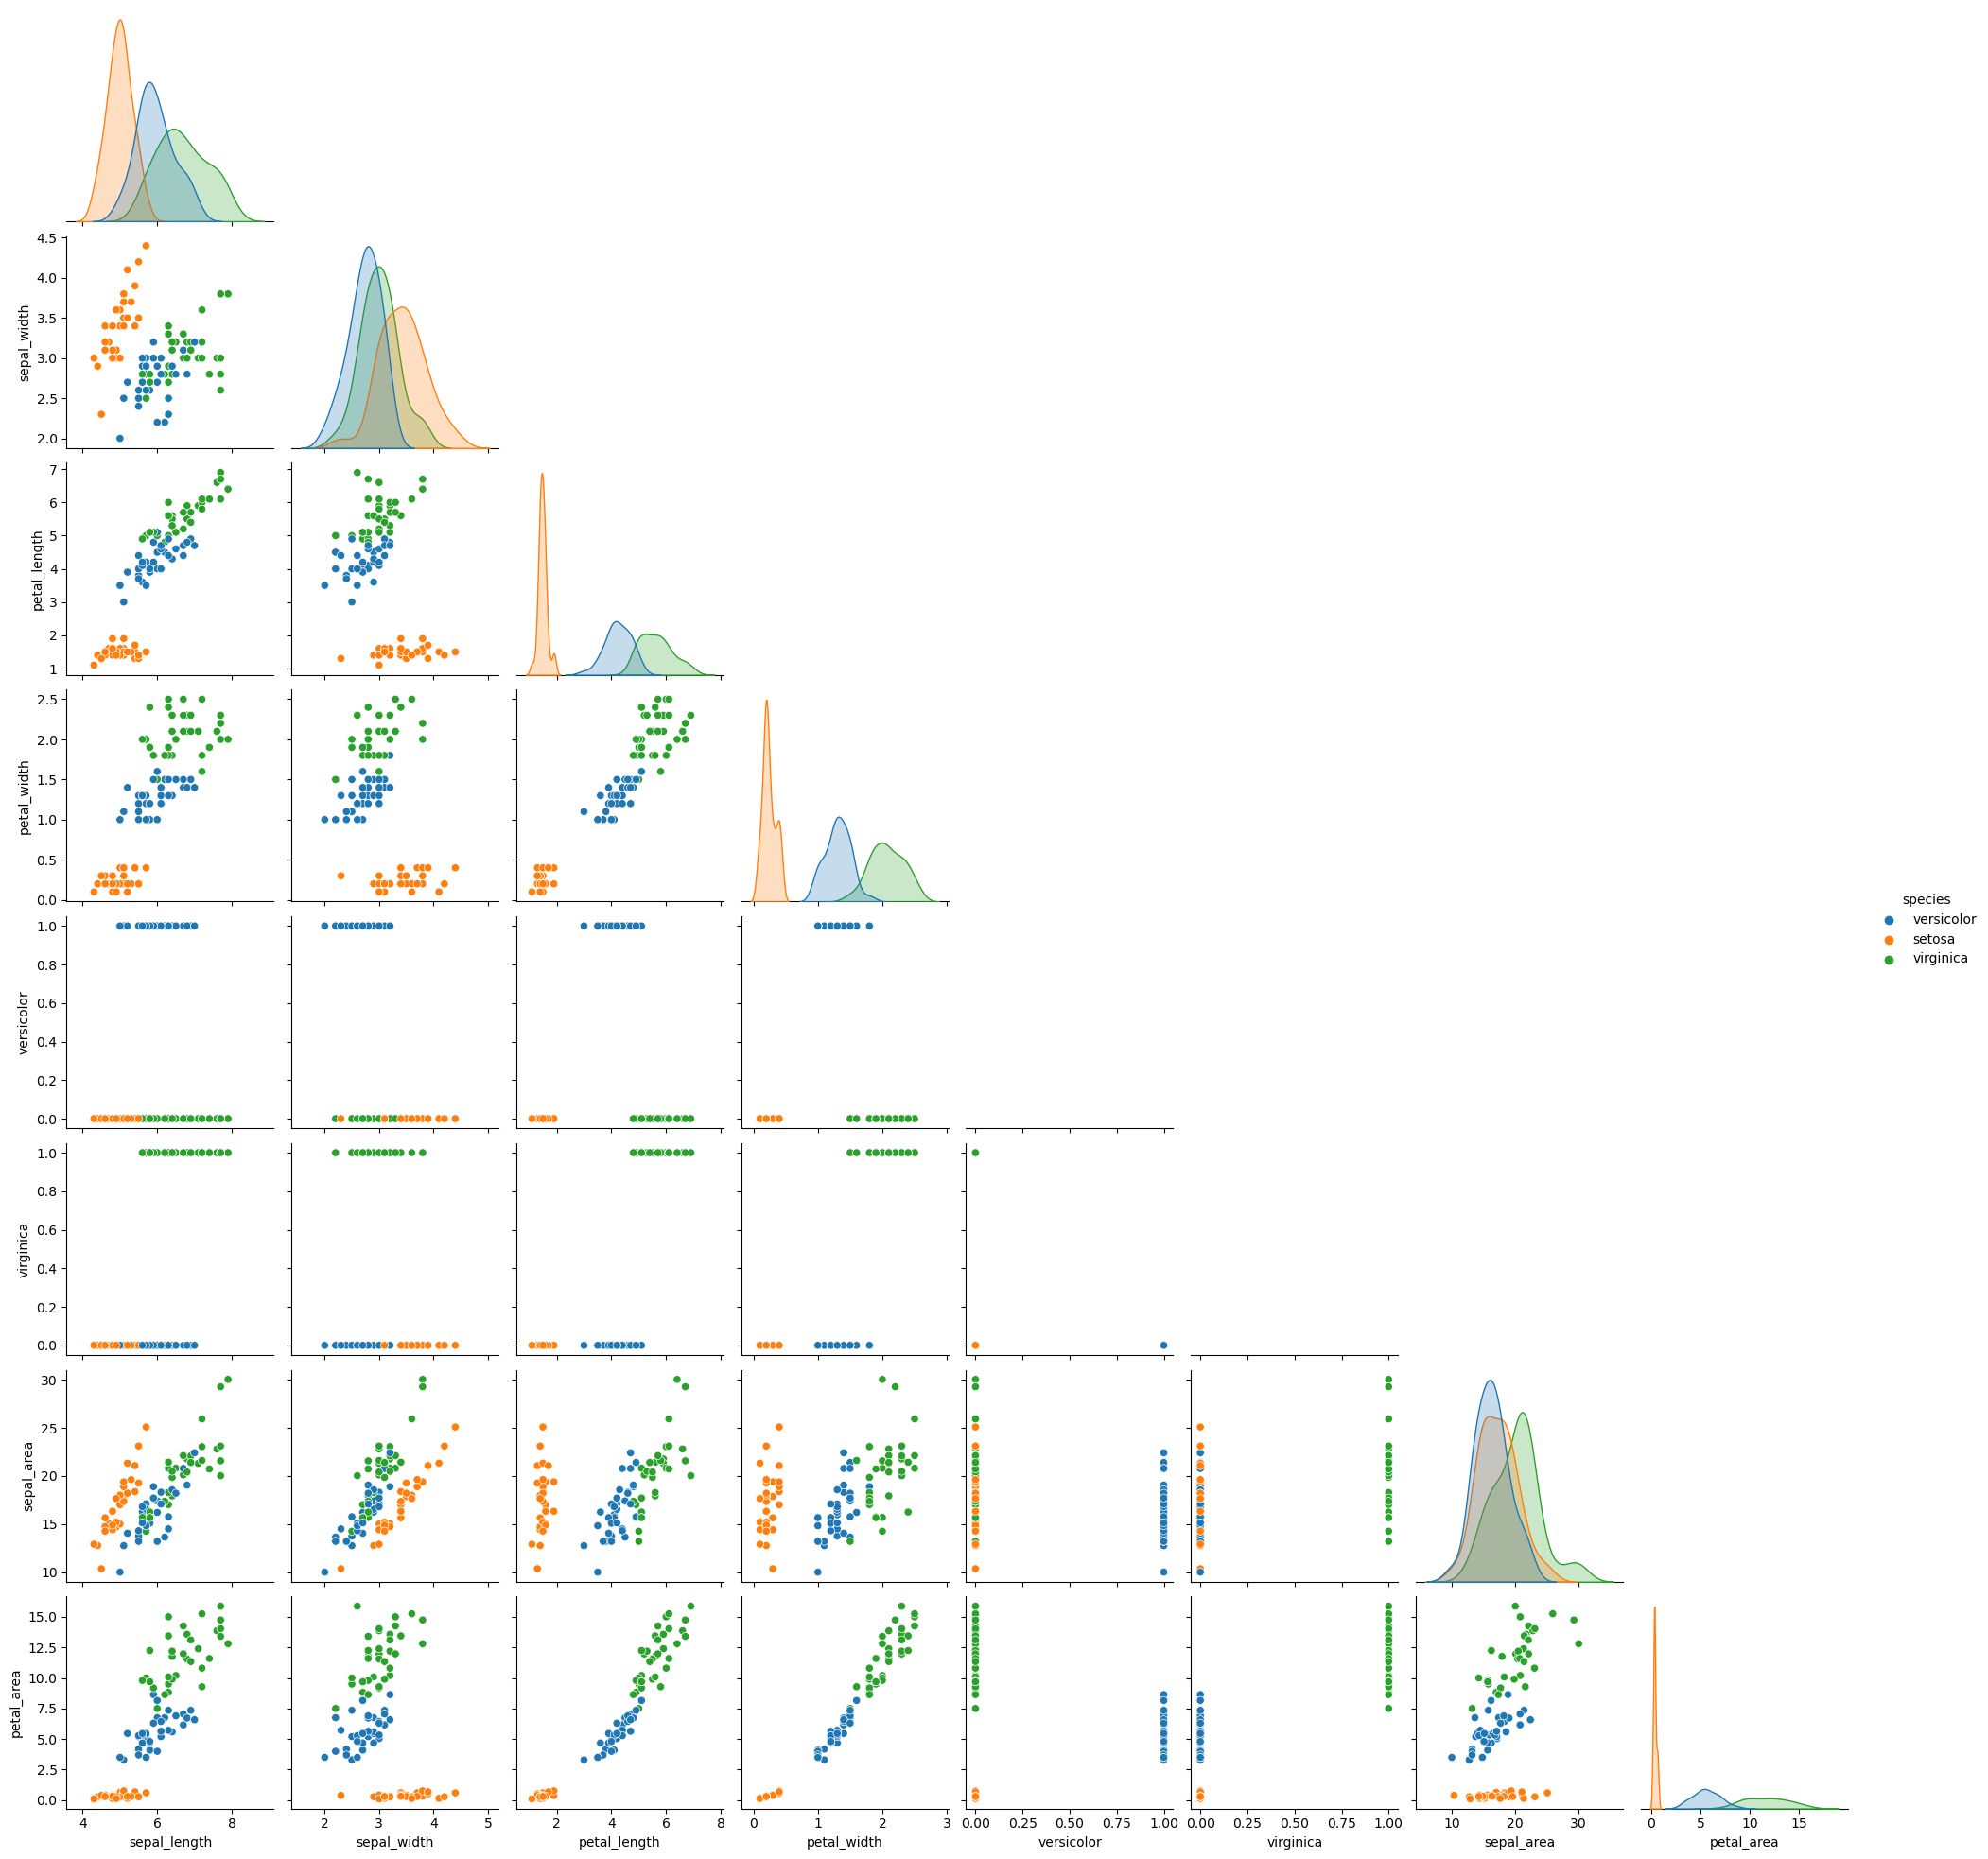

In [16]:

sns.pairplot(train, hue='species', corner = True)
plt.show()



In [13]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train['petal_length'] * train['petal_width']


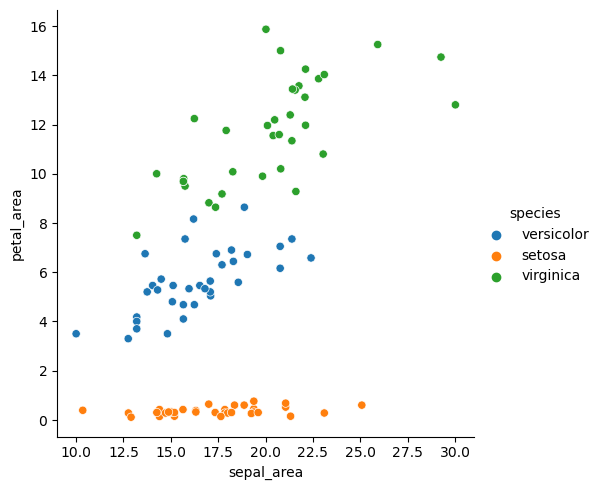

In [23]:
sns.relplot(data=train, x='sepal_area', y='petal_area', hue='species')
plt.show()

**Takeaway**

-  petal length and petal width  can be used to distingush setosa from the others, and can be helpful for the other 2.
- Setosa has the shortest petal length and width.
- Virginica ha the longest of both of those.
- Sepal length can also help separate virginica and versicolor, as virginia is slighlty shorter
- 

In [27]:
train.head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica,sepal_area,petal_area
98,versicolor,5.1,2.5,3.0,1.1,1,0,12.75,3.30
68,versicolor,6.2,2.2,4.5,1.5,1,0,13.64,6.75
19,setosa,5.1,3.8,1.5,0.3,0,0,19.38,0.45
143,virginica,6.8,3.2,5.9,2.3,0,1,21.76,13.57
99,versicolor,5.7,2.8,4.1,1.3,1,0,15.96,5.33


In [29]:
train_melt = train.melt(id_vars = 'species', var_name = 'measures', value_name = 'value')
train_melt.head()


,species,measures,value
0,versicolor,sepal_length,5.1
1,versicolor,sepal_length,6.2
2,setosa,sepal_length,5.1
3,virginica,sepal_length,6.8
4,versicolor,sepal_length,5.7


In [30]:
train_melt.measures.value_counts()

sepal_length    105
sepal_width     105
petal_length    105
petal_width     105
versicolor      105
virginica       105
sepal_area      105
petal_area      105
Name: measures, dtype: int64

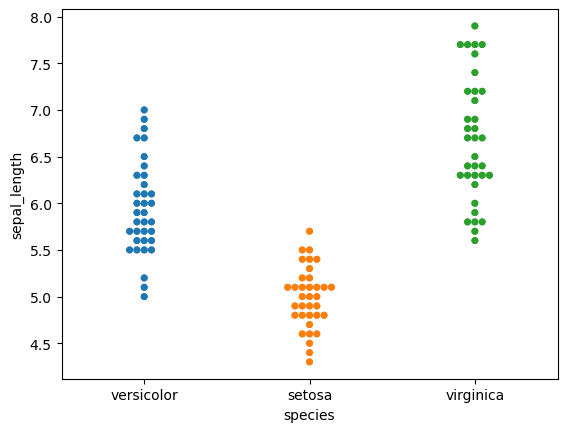

In [26]:
sns.swarmplot(data=train, x='species', y='sepal_length')
plt.show()

In [119]:
train_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   species   630 non-null    object 
 1   variable  630 non-null    object 
 2   value     630 non-null    float64
dtypes: float64(1), object(2)
memory usage: 14.9+ KB


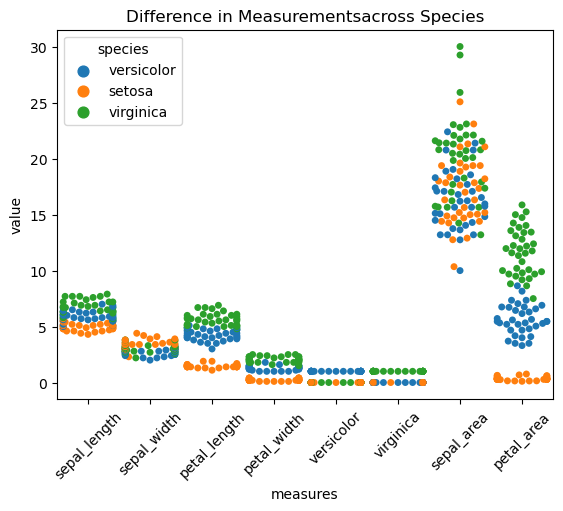

In [40]:
plt.title('Difference in Measurementsacross Species')
sns.swarmplot(data=train_melt, x='measures', y='value', hue='species')
plt.xticks(rotation = 45)
plt.show()

# Part II

Explore your titanic dataset more completely.

 - Determine drivers of the target variable: sex, pclass, alone, sibling/spouse
 - Determine if certain columns should be dropped: no additional columns, although we could drop fare because of too many variables in fare
 - Determine if it would be valuable to bin some numeric columns: we would not want to bin fare because of too many variable within the data
 - Determine if it would be valuable to combine multiple columns into one: NO
Does it make sense to combine any features?: NO

Do you find any surprises?: NO

Document any and all findings and takeaways in your notebook using markdown.

In [4]:
titanic = acquire.get_titanic_data()
titanic

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [5]:
df = prepare.prep_titantic(titanic)
df.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [8]:
col = 'survived'
train, validate, test = train_val_test(df, col)
train.shape, validate.shape, test.shape

((623, 11), (134, 11), (134, 11))

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 748 to 136
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 623 non-null    int64  
 1   pclass                   623 non-null    int64  
 2   sex                      623 non-null    object 
 3   sibsp                    623 non-null    int64  
 4   parch                    623 non-null    int64  
 5   fare                     623 non-null    float64
 6   embark_town              623 non-null    object 
 7   alone                    623 non-null    int64  
 8   sex_male                 623 non-null    uint8  
 9   embark_town_Queenstown   623 non-null    uint8  
 10  embark_town_Southampton  623 non-null    uint8  
dtypes: float64(1), int64(5), object(2), uint8(3)
memory usage: 45.6+ KB


In [10]:
num_vars = df.select_dtypes(include = ['float64', 'int64'])
cat_vars = df.select_dtypes(include= ['object', 'uint8'])

In [11]:
num_vars.describe()

,survived,pclass,sibsp,parch,fare,alone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.523008,0.381594,32.204208,0.602694
std,0.486592,0.836071,1.102743,0.806057,49.693429,0.489615
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200,1.000000


In [12]:
cat_vars.describe()

,sex_male,embark_town_Queenstown,embark_town_Southampton
count,891.000000,891.000000,891.000000
mean,0.647587,0.086420,0.725028
std,0.477990,0.281141,0.446751
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000


In [13]:
cat_vars.columns.to_list()

['sex',
 'embark_town',
 'sex_male',
 'embark_town_Queenstown',
 'embark_town_Southampton']

In [14]:
num_vars.columns.to_list()

['survived', 'pclass', 'sibsp', 'parch', 'fare', 'alone']

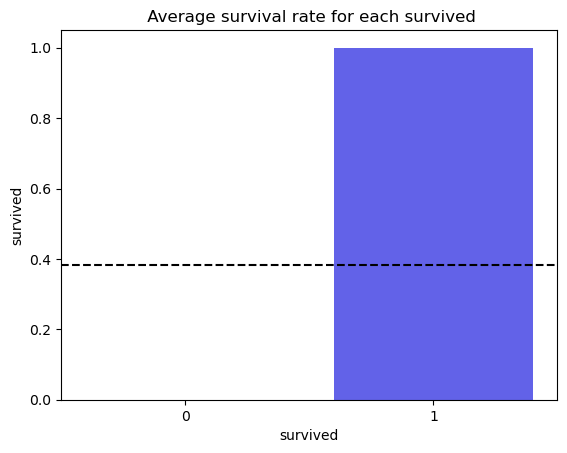

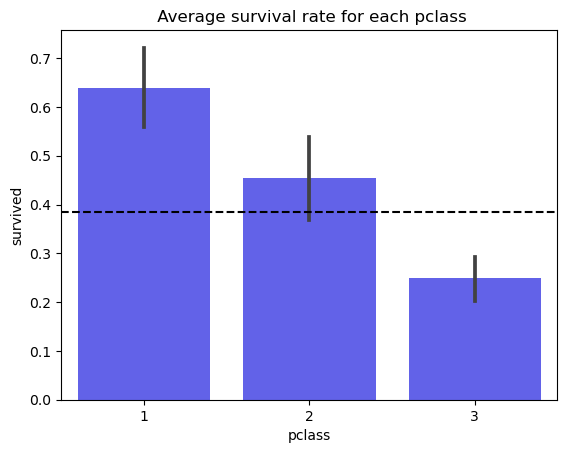

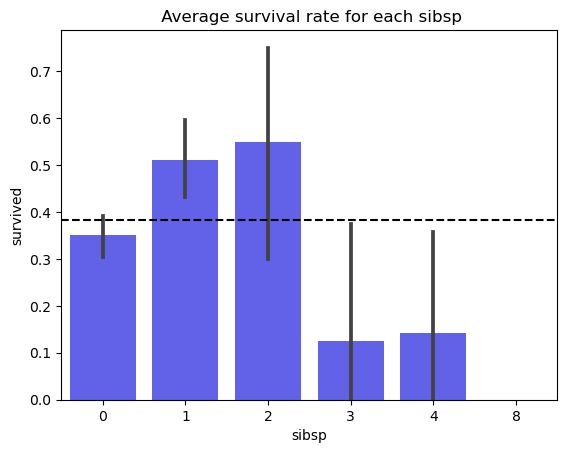

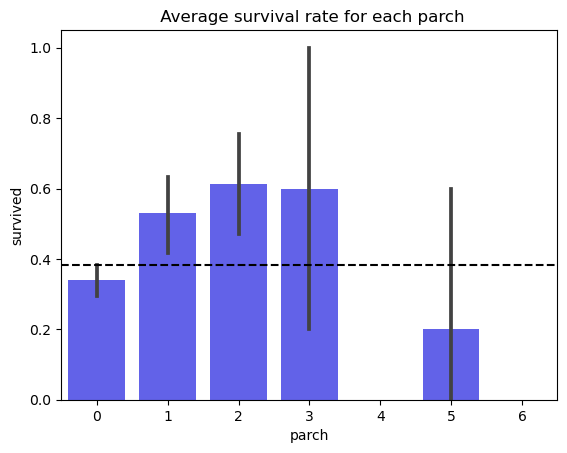

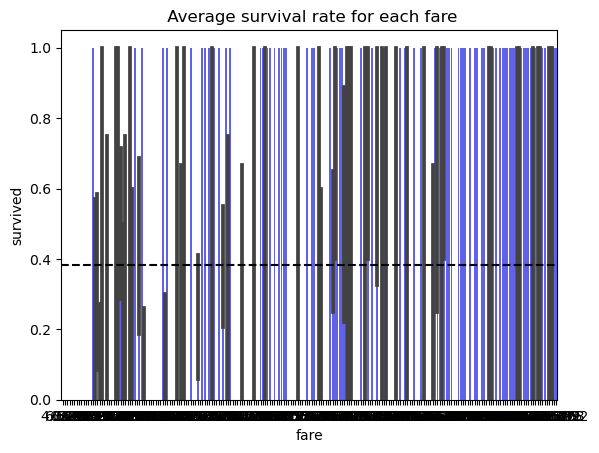

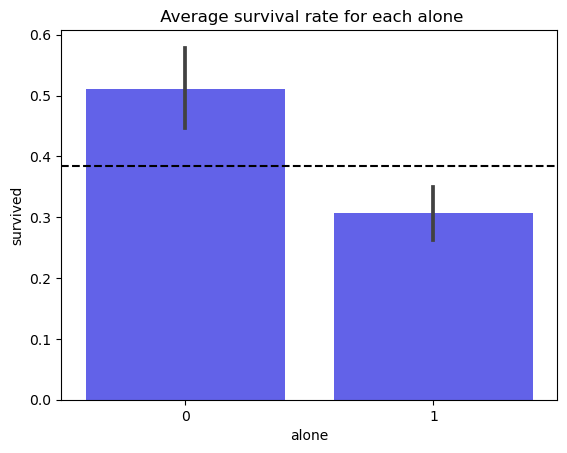

In [15]:
survival_rate = train.survived.mean()

for col in num_vars:
    sns.barplot(x = col, y = 'survived', data = train, color =  'blue', alpha = .7)
    plt.title(f' Average survival rate for each {col}')
    plt.axhline(survival_rate, color = 'black', ls = '--')
    plt.show()

## Questions to ask
- Does traveling alone different based on sex?

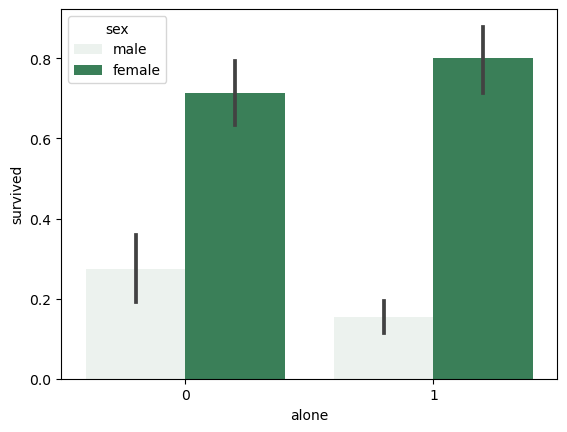

In [16]:
female = train[train.sex == 'female']
male = train[train.sex == 'male']

sns.barplot(x = 'alone', y = 'survived', data = train, hue = 'sex', color = 'seagreen')
plt.show()



It looks like males are less likely to survive if not alone

**Does class impact the survival rate of males or female?**

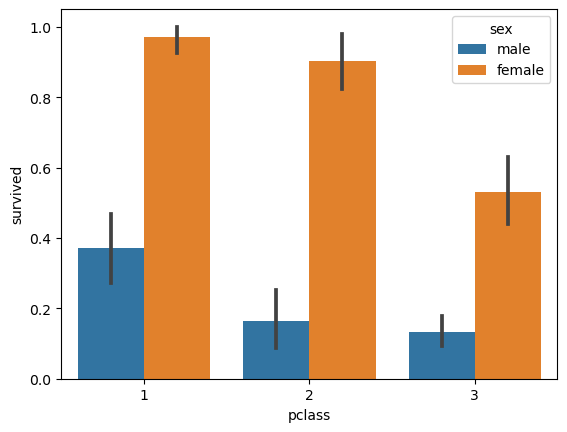

In [17]:
sns.barplot(x = 'pclass', y = 'survived', data = train, hue = 'sex')
plt.show()

- The females that didn't survive seem to be in 3rd class 
- if a male survived, he was likely in 1st class

**Of the females in 3rd class, were they more likely to survive if they were alone or not alone(or neither)?**

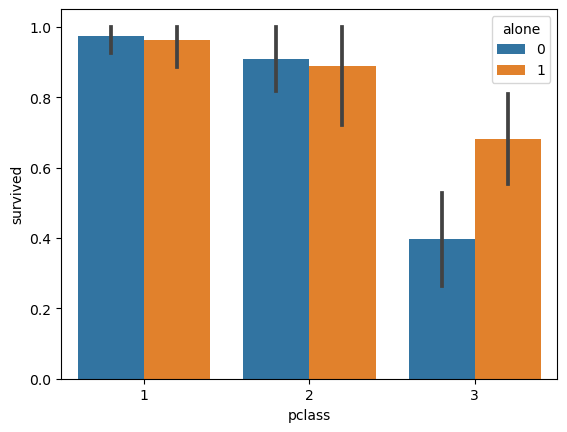

In [18]:
sns.barplot(x = 'pclass', y = 'survived', data = train[train.sex == 'female'], hue = 'alone')
plt.show()

Run a test to see if females in 3rd classs who travel alone are significantly more likely to survive than those who are not traveling alone.

$H_0$: Survival rate of females in 3rd class alone <= survival rate of females in 3rd class not alone<br>
$H_a$: Survival rate of females in 3rd class alone > survival rate of females in 3rd class not alone


In [19]:
𝜶 = 0.05

In [24]:
sample = train[(train['pclass'] == 3) & (train['sex'] == 'female')]
observed = pd.crosstab(sample.alone, sample.survived)
chi2, p, df, expected = stats.chi2_contingency(observed)

p < 𝜶

# should be false

True

Fail to reject the null hypothesis. Females in 3rd class traveling alone are not significantly more likely to survive than those not traveling alone.

**Takeaways**

- More likely to survive: first class
 - women
 - traveling alone
 - 1 sibling or spouse
 
- It looks like males are less likely to survive if not alone 
- The females that didn't survive seem to be in 3rd class
- if a male survived, he was likely in 1st class
- Females in 3rd class appear more likely to survive if they were traveling alone, However, upon chi-2 test, we found this is not the case.
 

# Part III

- Explore your telco data to discover drivers of churn
- Determine if certain columns should be dropped
- Determine if it would be valuable to bin some numeric columns
- Determine if it would be valuable to combine multiple columns into one.


What are your drivers of churn?

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

In [26]:
telco = acquire.get_telco_data()
telco.head()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [27]:
df = prepare.prep_telco(telco)
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,1,0,0,1,0,0,0,0,0,1
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,0,0,1,0,0,0,0,0,0,1
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,0,0,0,0,0,1,0,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,1,0,1,0,0,1,0,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,1,0,0,0,0,1,0,0,0,1


In [37]:
df.columns.to_list()

['customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'gender_encoded',
 'partner_encoded',
 'dependents_encoded',
 'phone_service_encoded',
 'paperless_billing_encoded',
 'churn_encoded',
 'multiple_lines_No phone service',
 'multiple_lines_Yes',
 'online_security_No internet service',
 'online_security_Yes',
 'online_backup_No internet service',
 'online_backup_Yes',
 'device_protection_No internet service',
 'device_protection_Yes',
 'tech_support_No internet service',
 'tech_support_Yes',
 'streaming_tv_No internet service',
 'streaming_tv_Yes',
 'streaming_movies_No internet service',
 'streaming_movies_Yes',
 'contract_type_One year',
 'contract_type_Two year',
 'internet

In [29]:
col = 'churn'
train, validate, test = train_val_test(df, col)
train.shape, validate.shape, test.shape

((4930, 48), (1056, 48), (1057, 48))

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4930 entries, 5609 to 5679
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            4930 non-null   object 
 1   gender                                 4930 non-null   object 
 2   senior_citizen                         4930 non-null   int64  
 3   partner                                4930 non-null   object 
 4   dependents                             4930 non-null   object 
 5   tenure                                 4930 non-null   int64  
 6   phone_service                          4930 non-null   object 
 7   multiple_lines                         4930 non-null   object 
 8   online_security                        4930 non-null   object 
 9   online_backup                          4930 non-null   object 
 10  device_protection                      4930 non-null   object 
 11  t

In [34]:
num_vars = df.select_dtypes(include = ['float64', 'int64'])
cat_vars = df.select_dtypes(include= ['object', 'uint8'])

In [35]:
num_vars.columns.to_list()

['senior_citizen',
 'tenure',
 'monthly_charges',
 'gender_encoded',
 'partner_encoded',
 'dependents_encoded',
 'phone_service_encoded',
 'paperless_billing_encoded',
 'churn_encoded']

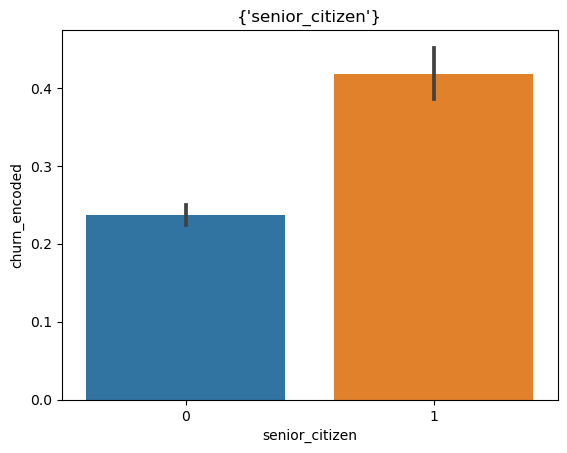

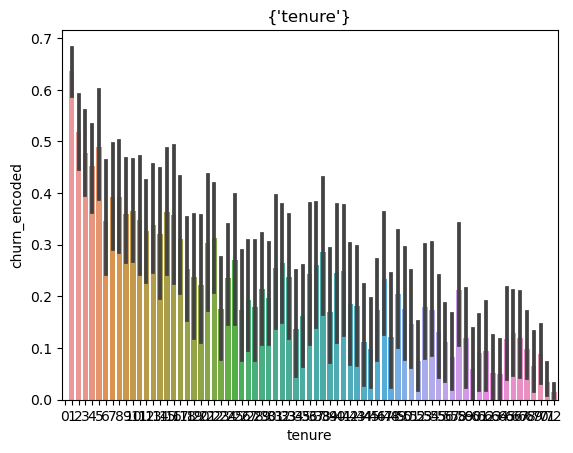

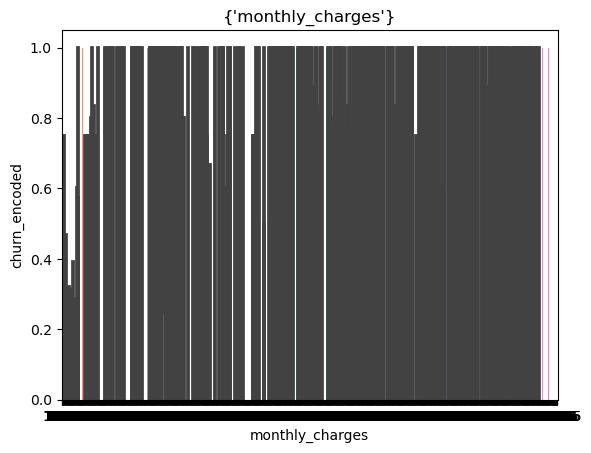

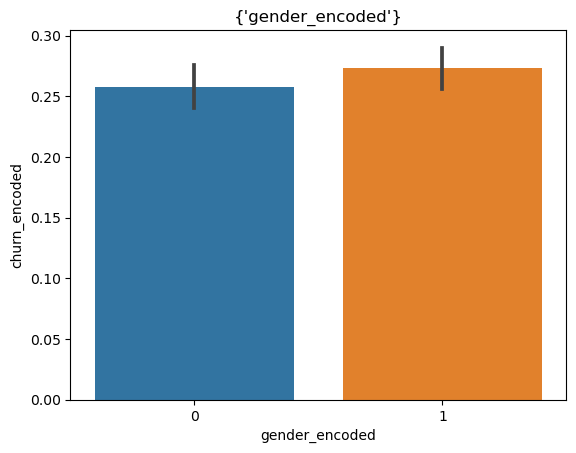

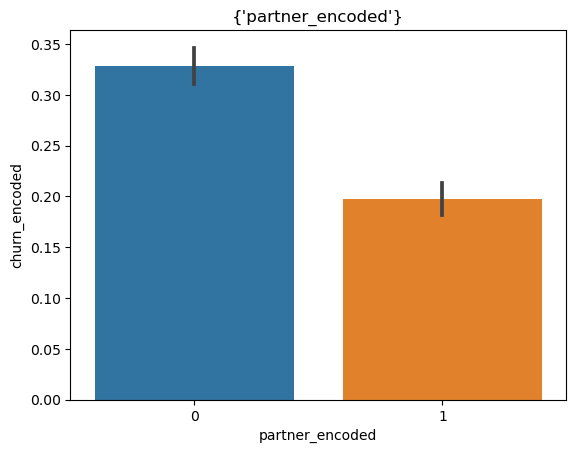

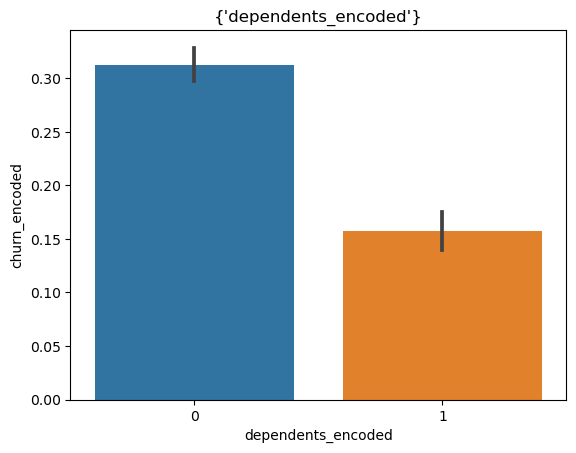

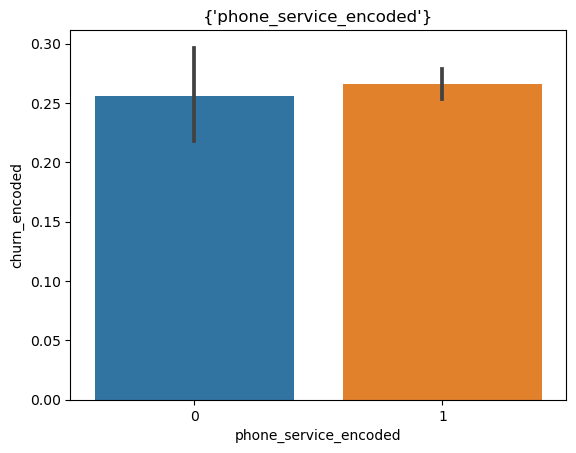

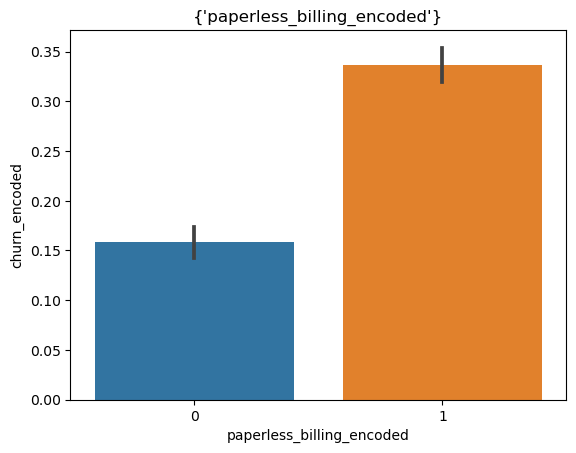

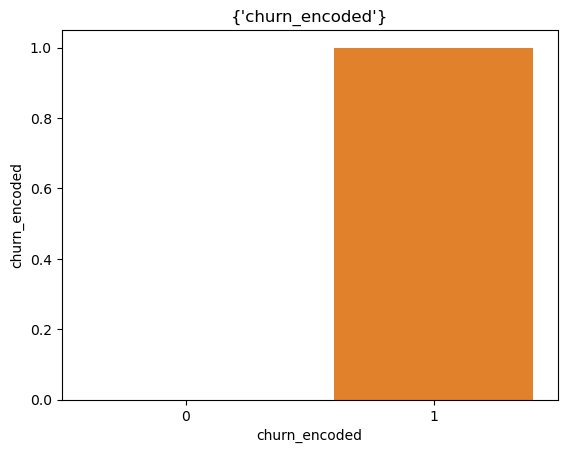

In [36]:
for col in num_vars:
    plt.title({col})
    sns.barplot(x= col, y = "churn_encoded", data=train)
    plt.show()

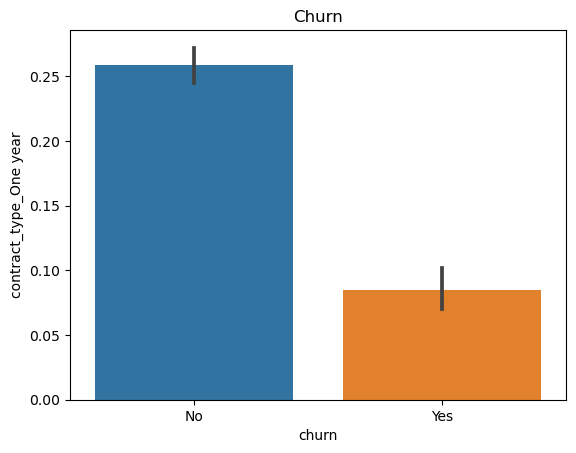

In [32]:
plt.title("Churn")
sns.barplot( x ="churn", y ="contract_type_One year", data=train)
plt.show()

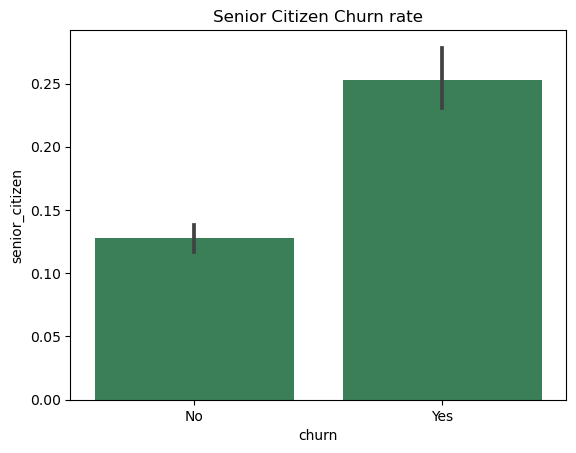

In [38]:
plt.title("Senior Citizen Churn rate")
sns.barplot( x ="churn", y ="senior_citizen", data=train, color = 'seagreen')
plt.show()